## **1. Installation**

Load your dataset

In [3]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
%matplotlib inline

--2022-01-20 16:15:08--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip.10’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.01s   

2022-01-20 16:15:08 (119 MB/s) - ‘Mask_RCNN_basic_1.zip.10’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
replace Mask_RCNN/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Mask_RCNN/.gitignore    
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in   
  inflating: Mask_RCNN/mrcnn/config.py  
  inflating: Mask_RCNN/mrcnn/model.py  
  inflating: Mask_RCNN/mrcnn/m_rcnn.py  
  inflating: Mask_RCNN/mrcnn/parallel_model.py  
  inflating: Mask_RCNN/mrcnn/utils.py  
  inflating: Mask_RCNN/

In [7]:
import os
import sys
sys.path.append("/content/Mask_RCNN/")
print(os.getcwd())
print(os.listdir(os.getcwd()))
from mrcnn import *
from mrcnn.m_rcnn import *

/content
['.config', 'Mask_RCNN', 'Mask_RCNN_basic_1.zip.6', 'Mask_RCNN_basic_1.zip.4', 'Mask_RCNN_basic_1.zip.10', 'Mask_RCNN_basic_1.zip.3', 'Mask_RCNN_basic_1.zip.2', 'with_cracks.zip', 'Mask_RCNN_basic_1.zip', 'annotations_coco.json', 'Mask_RCNN_basic_1.zip.7', 'Mask_RCNN_basic_1.zip.5', 'Mask_RCNN_basic_1.zip.9', 'Mask_RCNN_basic_1.zip.8', 'Mask_RCNN_basic_1.zip.1', 'dataset', 'sample_data']
VERS 0.2


Using TensorFlow backend.


## **2. Image Dataset**

Load your annotated dataset


In [8]:
# Extract Images
images_path = "with_cracks.zip"
annotations_path = "annotations_coco.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 687 images


In [9]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/annotations_coco.json
Annotation json path:  /content/annotations_coco.json
Train: 611
Validation: 76
Classes: 2


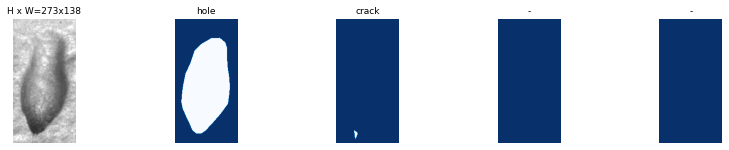

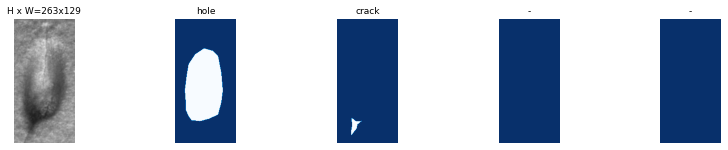

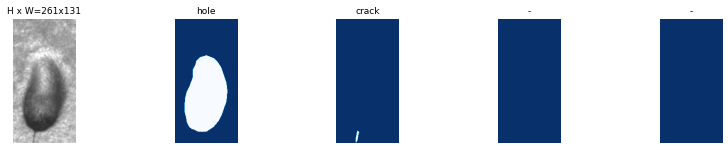

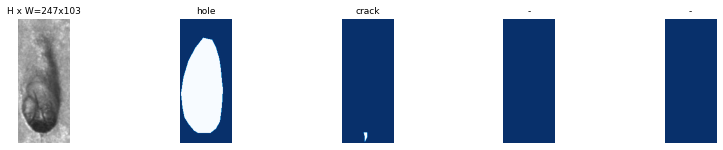

In [10]:
# Load image samples
display_image_samples(dataset_train)

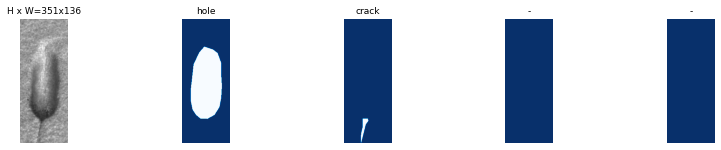

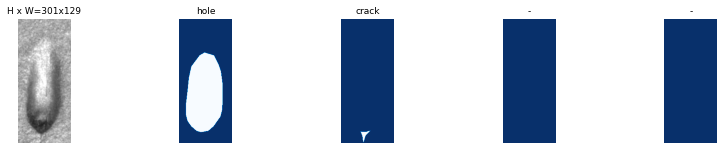

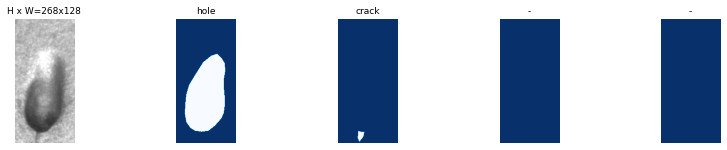

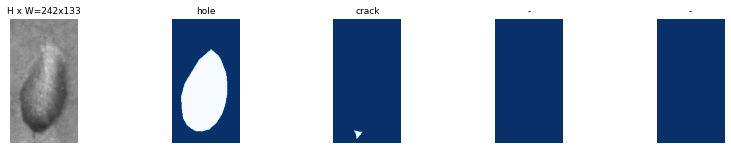

In [11]:
# Load image samples
display_image_samples(dataset_val)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [12]:
class CustomConfig(Config):
    """Configuration for training on the custom  dataset.
    Derives from the base Config class and overrides some values.
    """
    """# Give the configuration a recognizable name
    NAME = "object"

    IMAGES_PER_GPU = 1

    NUM_CLASSES = 1 + 2  # Background + Car and truck

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 10

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9"""

    # Give the configuration a recognizable name
    NAME = "object"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 4

    # Number of classes
    NUM_CLASSES = 1 + 2

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 384

    # channel of images: 
    # IMAGE_CHANNEL_COUNT = 1

    # Use smaller anchors because our image and objects are small
    # RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    # TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 500

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5

    DETECTION_MIN_CONFIDENCE = 0.9

# Load Configuration
config = CustomConfig()
config.display()
model = load_training_model(config)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_val, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220120T1523/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

## **4. Detection (test your model on a random image)**

In [37]:
# Load Test Model
# The latest trained model will be loaded
# test_model, inference_config = load_test_model(class_number)
#LOAD MODEL. Create model in inference mode
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)



Instructions for updating:
Use `tf.cast` instead.


original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Annotation


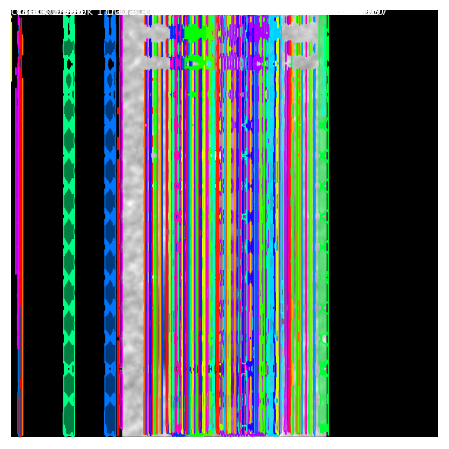

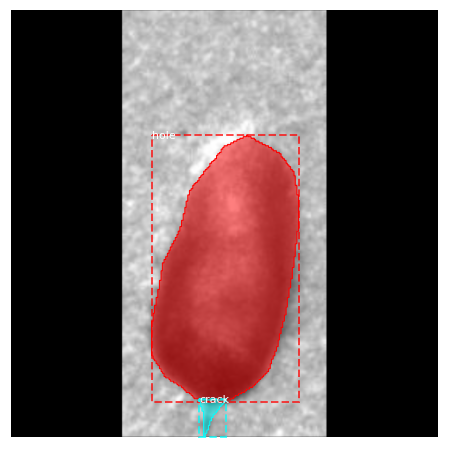

In [40]:
# Test on a random image
test_random_image(model, dataset_val, config)